In [25]:
import pandas as pd

cleaner = lambda col: col.str.strip().str.lower()

original_ds = pd.read_csv('../labelling/data_cleaned_manual.csv')
original_ds[['Global Subject', 'Question Intent']] = original_ds[['Global Subject', 'Question Intent']].apply(cleaner)
ds = pd.read_csv('data_cleaned_manual_combined.csv')
ds[['Global Subject', 'Question Intent']] = ds[['Global Subject', 'Question Intent']].apply(cleaner)

ds

,Question,Global Subject,Question Intent
0,Hi,start,greet
1,Hello,start,greet
2,Describe the automaton,automaton,description
3,Is there a transition between q2 and q0?,transition,existence_between
4,Is there a transition between q5 and q7,transition,existence_between
...,...,...,...
1159,How is a self loop defined in the context of a...,grammar,transitions
1160,What determines whether an automaton accepts a...,grammar,generic
1161,How can you describe the overall behavior of a...,grammar,generic
1162,What mathematical tools are used to analyze au...,grammar,generic


In [26]:
print(len(original_ds))
original_ds["Global Subject"].value_counts()

228


Global Subject
transition    83
automaton     48
state         41
grammar       33
theory        15
off_topic      6
start          2
Name: count, dtype: int64

In [27]:
print(len(ds))
ds["Global Subject"].value_counts()

1164


Global Subject
transition    366
grammar       223
automaton     184
state         151
theory        115
off_topic     106
start          19
Name: count, dtype: int64

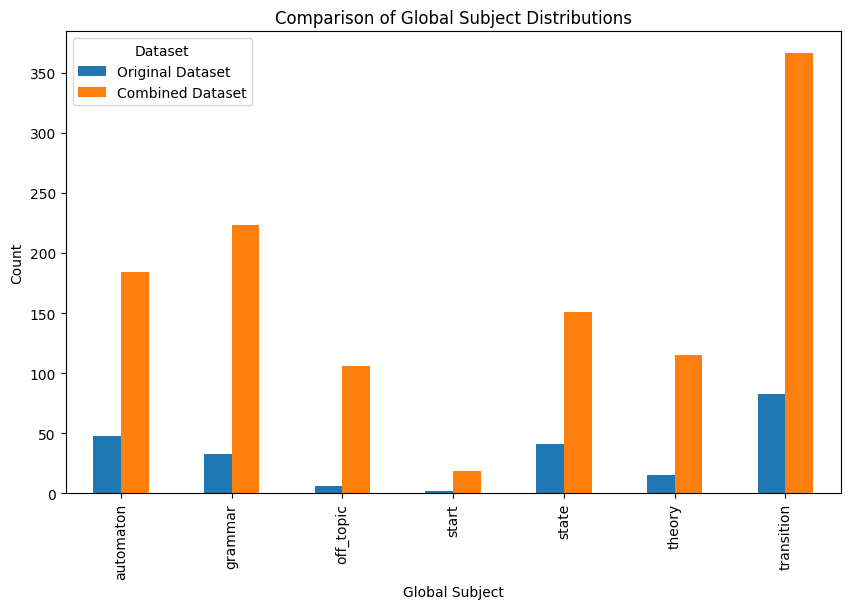

In [35]:
import matplotlib.pyplot as plt

merged_subjects = pd.DataFrame({
    "Original Dataset": original_ds.groupby('Global Subject')['Question Intent'].count(),
    "Combined Dataset": ds.groupby('Global Subject')['Question Intent'].count()
}).fillna(0)

merged_subjects.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Global Subject Distributions')
plt.xlabel('Global Subject')
plt.ylabel('Count')
plt.legend(title='Dataset')
plt.show()

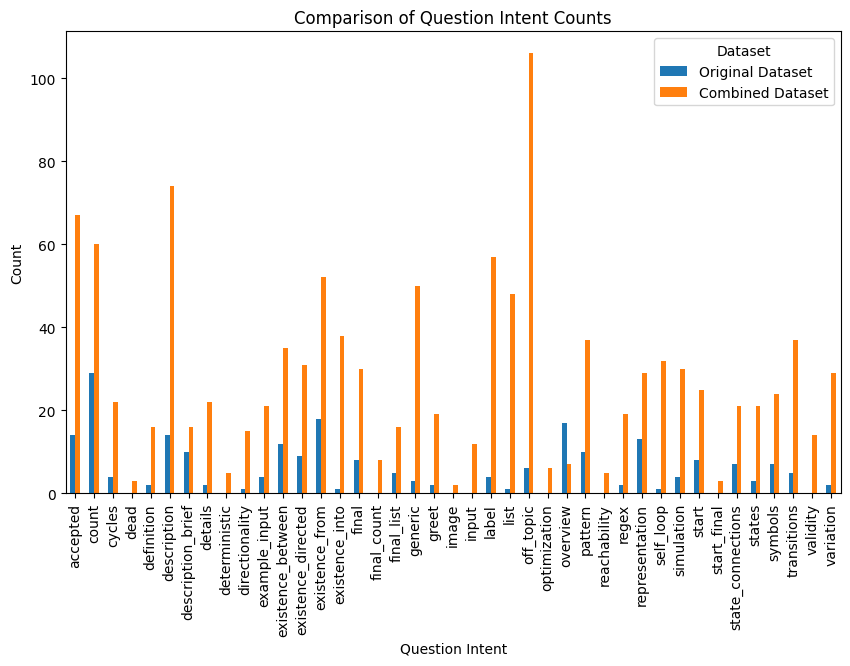

In [36]:
counts = {
    "Original Dataset": original_ds['Question Intent'].value_counts(),
    "Combined Dataset": ds['Question Intent'].value_counts()
}

combined_counts = pd.DataFrame(counts).fillna(0)

combined_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Question Intent Counts')
plt.xlabel('Question Intent')
plt.ylabel('Count')
plt.legend(title='Dataset')
plt.show()